# Anomaly Detection & Time Series

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.


Answer - **Anomaly Detection** is the process of identifying data points or patterns that differ significantly from normal behavior. These unusual patterns are called anomalies or outliers and often indicate fraud, errors, or faults.



**Types of Anomalies**

1. **Point Anomaly**
   A single data point that is very different from the rest.
   *Example:* A sudden very large bank transaction compared to normal spending.

2. **Contextual Anomaly**
   An anomaly that depends on context like time or location.
   *Example:* High electricity usage at midnight when it is usually low.

3. **Collective Anomaly**
   A group of data points that together form an unusual pattern.
   *Example:* Multiple failed login attempts indicating a possible attack.


Anomaly detection is commonly used in fraud detection, healthcare, and network security.


Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.

Answer - **Comparison of Isolation Forest, DBSCAN, and Local Outlier Factor (LOF)**

**Isolation Forest** detects anomalies by randomly splitting the data. Points that get isolated quickly are considered anomalies. It works well on large, high-dimensional datasets and is commonly used in fraud detection and intrusion detection.

**DBSCAN** identifies anomalies as points that do not belong to any dense cluster. It is useful for spatial data and datasets with clusters of arbitrary shapes, such as geographic data or sensor readings. However, it struggles when data density varies.

**Local Outlier Factor (LOF)** measures how isolated a point is compared to its neighbors. Points with much lower local density are treated as outliers. It is best for detecting local anomalies in datasets where data density changes.

**In summary**, Isolation Forest is good for large datasets, DBSCAN is effective for density-based anomalies, and LOF is suitable when local neighborhood behavior matters.


Question 3: What are the key components of a Time Series? Explain each with one
example.


Answer - **Key Components of a Time Series**

A **time series** is a sequence of data points collected over time. Its main components are:

1. **Trend**
   The long-term upward or downward movement in data.
   *Example:* A steady increase in yearly sales over several years.

2. **Seasonality**
   Regular patterns that repeat at fixed intervals.
   *Example:* Higher electricity consumption every summer.

3. **Cyclic**
   Fluctuations that occur over long periods but without a fixed frequency.
   *Example:* Business growth and slowdown due to economic cycles.

4. **Irregular (Noise)**
   Random variations that cannot be predicted.
   *Example:* Sudden drop in sales due to an unexpected event.

These components help in understanding and forecasting time-series data.


Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?


Answer - **Stationary Time Series**

A **stationary time series** is one whose statistical properties—**mean, variance, and autocorrelation**—remain constant over time. Stationarity is important because most time-series models work well only on stationary data.

**Testing Stationarity**

1. **Visual inspection** – Check if mean and variance look constant over time.
2. **Augmented Dickey-Fuller (ADF) Test** – A statistical test where a low p-value (< 0.05) indicates stationarity.

**Transforming a Non-Stationary Series**

1. **Differencing** – Subtract current value from previous value to remove trend.
2. **Log / Power transformation** – Stabilizes variance.
3. **Detrending** – Remove trend using regression or moving averages.

These methods help convert non-stationary data into stationary data for effective modeling.


Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

Dataset:

● NYC Taxi Fare Data

● AirPassengers Dataset


Answer - **Difference Between AR, MA, ARIMA, SARIMA, and SARIMAX Models**

**AR (AutoRegressive)**
Uses past values of the series to predict future values.
*Application:* Useful when current taxi demand depends on previous hours or days.

**MA (Moving Average)**
Uses past forecast errors to make predictions.
*Application:* Helps smooth short-term fluctuations in taxi fares.

**ARIMA (AutoRegressive Integrated Moving Average)**
Combines AR and MA with differencing to handle non-stationary data.
*Application:* Used for forecasting trends in datasets like long-term taxi fare data.

**SARIMA (Seasonal ARIMA)**
Extends ARIMA by adding seasonal components.
*Application:* Ideal for data with seasonality, such as monthly AirPassengers data.

**SARIMAX (Seasonal ARIMA with Exogenous Variables)**
SARIMA with external variables that influence the series.
*Application:* Taxi fare prediction using additional inputs like weather or holidays.

**In summary**, AR and MA are basic models, ARIMA handles non-stationarity, SARIMA captures seasonality, and SARIMAX includes external factors for better forecasts.


Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

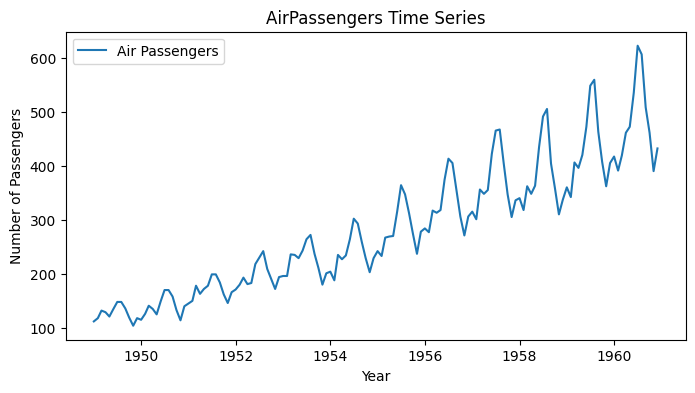

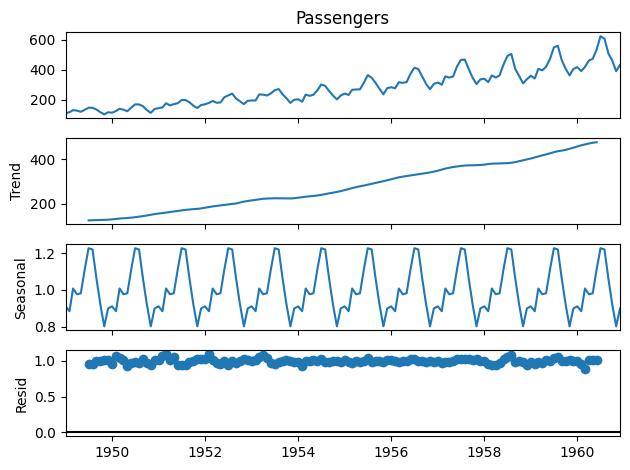

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
    parse_dates=["Month"],
    index_col="Month"
)

# Rename column for convenience
data.columns = ["Passengers"]

# Plot original time series
plt.figure(figsize=(8,4))
plt.plot(data, label="Air Passengers")
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(data["Passengers"], model="multiplicative")

# Plot decomposition
decomposition.plot()
plt.show()


Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.

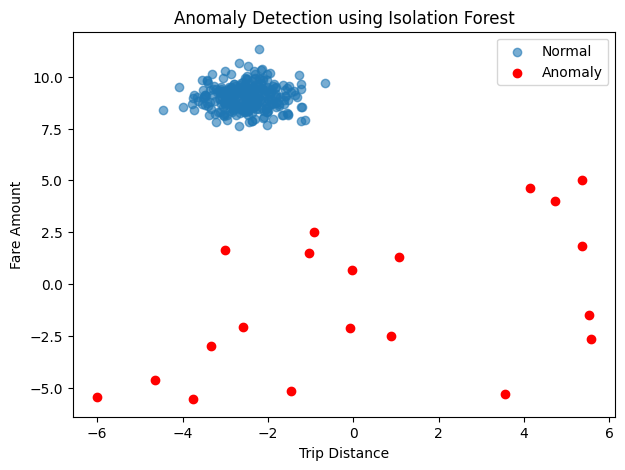

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs


X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=42)

anomalies = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X, anomalies])

df = pd.DataFrame(X, columns=["Trip_Distance", "Fare_Amount"])

iso_forest = IsolationForest(contamination=0.06, random_state=42)
df["anomaly"] = iso_forest.fit_predict(df)

normal = df[df["anomaly"] == 1]
outliers = df[df["anomaly"] == -1]

plt.figure(figsize=(7,5))
plt.scatter(normal["Trip_Distance"], normal["Fare_Amount"], label="Normal", alpha=0.6)
plt.scatter(outliers["Trip_Distance"], outliers["Fare_Amount"],
            color="red", label="Anomaly")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Anomaly Detection using Isolation Forest")
plt.legend()
plt.show()


Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


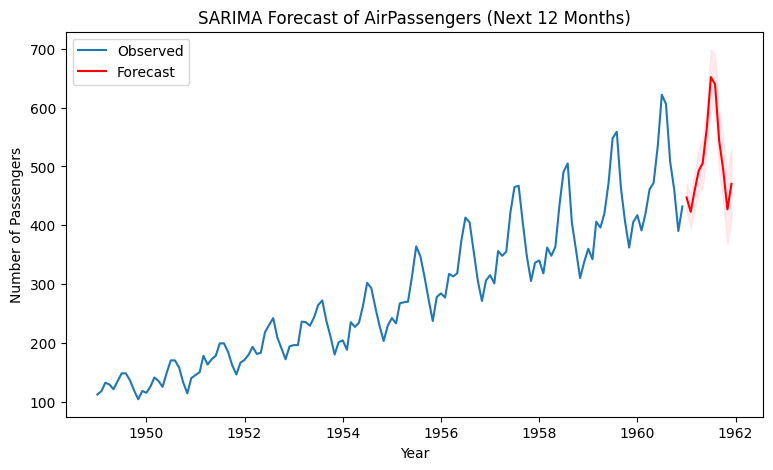

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
    parse_dates=["Month"],
    index_col="Month"
)

data.columns = ["Passengers"]

model = SARIMAX(
    data["Passengers"],
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(9,5))
plt.plot(data, label="Observed")
plt.plot(forecast_mean, label="Forecast", color="red")
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color="pink", alpha=0.3)
plt.title("SARIMA Forecast of AirPassengers (Next 12 Months)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib

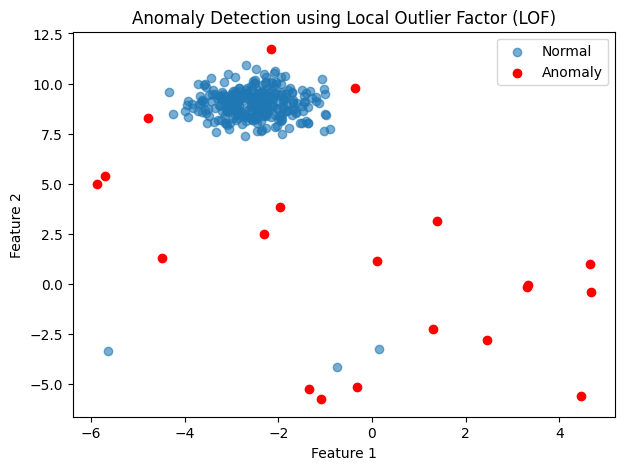

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.7, random_state=42)

outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X, outliers])

df = pd.DataFrame(X, columns=["Feature1", "Feature2"])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.06)
df["anomaly"] = lof.fit_predict(df)

normal = df[df["anomaly"] == 1]
outliers = df[df["anomaly"] == -1]

plt.figure(figsize=(7,5))
plt.scatter(normal["Feature1"], normal["Feature2"], label="Normal", alpha=0.6)
plt.scatter(outliers["Feature1"], outliers["Feature2"],
            color="red", label="Anomaly")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.legend()
plt.show()


Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?

Answer -  **Real-Time Data Science Workflow for Power Grid Monitoring**

To forecast energy demand and detect abnormal spikes or drops in real-time power consumption data, I would follow a structured workflow combining **anomaly detection** and **time-series forecasting**.

 **1. Anomaly Detection in Streaming Data**

For real-time anomaly detection, I would use **Isolation Forest** or **Local Outlier Factor (LOF)**.

* **Isolation Forest** is suitable because it is fast, scalable, and works well on high-frequency streaming data. It can quickly isolate unusual consumption spikes or sudden drops.
* **LOF** can be used when detecting local anomalies specific to a region or time window.
* **DBSCAN** is less preferred for real-time streams because it is computationally expensive and sensitive to parameter tuning.

Anomalies detected would trigger alerts for potential faults, equipment failure, or unexpected demand surges.



**2. Time Series Model for Short-Term Forecasting**

I would use **SARIMAX** for short-term energy demand forecasting.

* It captures **seasonality** (daily and weekly usage patterns).
* It allows inclusion of **exogenous variables** such as temperature, humidity, and region.
* This improves forecast accuracy compared to ARIMA or SARIMA alone.



**3. Validation and Performance Monitoring**

* Use **rolling window validation** to retrain and test the model on recent data.
* Monitor forecasting errors using **MAE or RMSE**.
* Track anomaly detection performance by reviewing false positives and missed events.
* Set automated alerts if model performance degrades over time.



**4. Business and Operational Benefits**

* Early detection of abnormal consumption prevents **grid failures and outages**.
* Accurate forecasts help in **load balancing and resource planning**.
* Enables better **demand response strategies** and cost optimization.
* Improves system reliability and customer satisfaction.



**In summary**, combining anomaly detection with SARIMAX forecasting enables proactive monitoring, efficient energy management, and data-driven decision-making for power grid operations.


/tmp/ipython-input-284126686.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range(start="2025-01-01", periods=30*24*4, freq="15T")


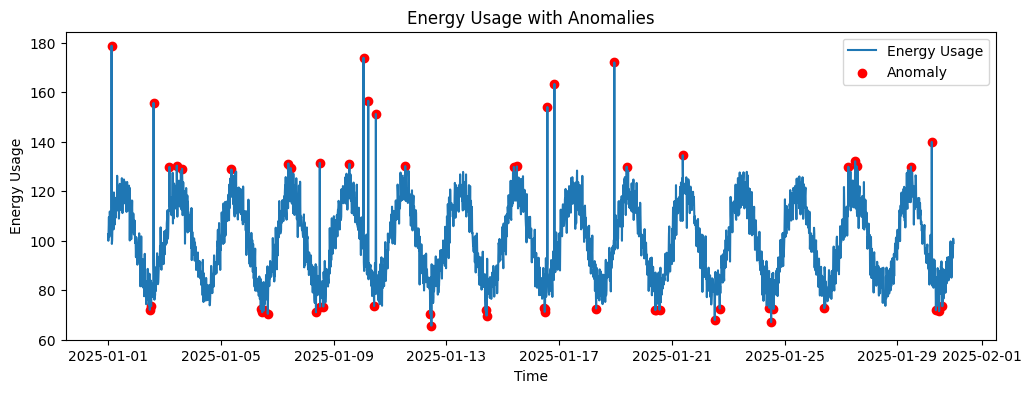

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# -----------------------------
# Simulate 15-min interval energy data for 30 days
# -----------------------------
np.random.seed(42)
time_index = pd.date_range(start="2025-01-01", periods=30*24*4, freq="15T")
base_usage = 100 + 20*np.sin(np.linspace(0, 30*np.pi, len(time_index)))  # daily pattern
noise = np.random.normal(0, 5, len(time_index))
# Introduce some anomalies
anomalies = np.random.choice(len(time_index), 10)
usage = base_usage + noise
usage[anomalies] += np.random.randint(50, 80, len(anomalies))

data = pd.DataFrame({"Timestamp": time_index, "Energy_Usage": usage})
data.set_index("Timestamp", inplace=True)

# -----------------------------
# Anomaly Detection using Isolation Forest
# -----------------------------
iso_forest = IsolationForest(contamination=0.02, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['Energy_Usage']])

# Visualize anomalies
plt.figure(figsize=(12,4))
plt.plot(data.index, data['Energy_Usage'], label='Energy Usage')
plt.scatter(data.index[data['anomaly']==-1],
            data['Energy_Usage'][data['anomaly']==-1],
            color='red', label='Anomaly')
plt.title("Energy Usage with Anomalies")
plt.xlabel("Time")
plt.ylabel("Energy Usage")
plt.legend()
plt.show()

# -----------------------------
# Short-term Forecasting using SARIMAX
# -----------------------------
# We'll forecast the next 24 intervals (~6 hours)
model = SARIMAX(data['Energy_Usage'], order=(1,1,1), seasonal_order=(1,1,1,96),  # 96 = 24h*4 intervals
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast_steps = 24
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Visualize Forecast
plt.figure(figsize=(12,4))
plt.plot(data.index, data['Energy_Usage'], label='Observed')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='15T')[1:],
         forecast_mean, color='red', label='Forecast')
plt.fill_between(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='15T')[1:],
                 conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMAX Forecast of Energy Usage")
plt.xlabel("Time")
plt.ylabel("Energy Usage")
plt.legend()
plt.show()
